# Import Library

In [1]:
# Pustaka manipulasi dan visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pustaka keperluan model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import Normalizer

# Mengabaikan peringatan
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# Memuat Dataset
df = pd.read_csv('https://raw.githubusercontent.com/elvinojunior/dicoding_ML_terapan2/refs/heads/main/indonesian_movies.csv')
df

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min
...,...,...,...,...,...,...,...,...,...,...,...
1267,The Tiger from Tjampa,1953,"Set in the 1930s, and narrated like a ballad f...",Drama,NaN,6.4,30,Indonesian,D. Djajakusuma,"['Wahid Chan', 'Bambang Hermanto', 'R.D. Ismai...",97 min
1268,Enam Djam di Djogja,1951,Depicting the celebrated recapture of the town...,Drama,NaN,6.3,9,Indonesian,Usmar Ismail,"['R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A...",116 min
1269,Darah dan Doa,1950,It tells the story of an Indonesian revolution...,Drama,NaN,6.6,27,Indonesian,Usmar Ismail,"['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del...",150 min
1270,Resia Boroboedoer,1928,NaN,Adventure,NaN,7.0,8,Indonesian,NaN,"['Olive Young', nan, nan, nan, nan, nan, nan, ...",NaN


Setelah memuat dan menampilkan dataset, dapat diketahui bahwa data memiliki 1272 baris dan 11 kolom

# Data Understanding

In [3]:
# Ringkasan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


Dari ringkasan informasi dataset kita dapat menilai bahwa dataset memiliki missing values yang banyak, serta tipe data yang belum sesuai pada kolom votes

In [4]:
# Statistik deskriptif dataset
df.describe(include="all")

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
count,1272,1272.000000,840,1236,376,1272.000000,1272,1272,1265,1272,869
unique,1262,NaN,840,15,11,NaN,312,8,377,1266,85
top,Arini,NaN,It tells the story of an Indonesian revolution...,Drama,13+,NaN,6,Indonesian,Nayato Fio Nuala,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",90 min
freq,2,NaN,1,456,161,NaN,58,1241,61,4,109
mean,NaN,2007.023585,NaN,NaN,NaN,6.144418,NaN,NaN,NaN,NaN,NaN
std,NaN,12.968560,NaN,NaN,NaN,1.389315,NaN,NaN,NaN,NaN,NaN
min,NaN,1926.000000,NaN,NaN,NaN,1.200000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2006.000000,NaN,NaN,NaN,5.300000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2011.000000,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,NaN,NaN


Insight :
- **Data tidak sempurna:** Banyak missing value pada beberapa kolom (description, genre, rating, directors, runtime).
- **Genre Drama dominan**
- **Distribusi tahun:** Data meliputi film dari 1926 hingga 2020, dengan mayoritas film modern.
- **Rata-rata rating pengguna cukup baik:** Mayoritas film mendapat rating pengguna di atas 6.
- **Mayoritas film berdurasi 90 menit:** Ini adalah durasi paling umum film Indonesia di dataset.
- **Sutradara dan aktor sangat bervariasi**

# Data Cleaning

In [5]:
# Cek nilai yang kosong
print(df.isnull().sum())
# Cek nilai duplikat
print(f'\njumlah duplikasi data : {df.duplicated().sum()}')

title             0
year              0
description     432
genre            36
rating          896
users_rating      0
votes             0
languages         0
directors         7
actors            0
runtime         403
dtype: int64

jumlah duplikasi data : 0


Tidak ada duplikasi data namun terdapat banyak nya missing values pada dataset. Mari kita tangani

In [6]:
# Kategori genre pada dataset
print(f"data unik di kolom genre : {df['genre'].unique()} total ada {df['genre'].nunique()}")

# Kategori rating pada dataset
print(f"\ndata unik di kolom rating : {df['rating'].unique()} total ada {df['rating'].nunique()}")

data unik di kolom genre : ['Biography' 'Thriller' 'Horror' 'Adventure' 'Drama' 'Comedy' 'Animation'
 'Action' 'History' 'Crime' 'Romance' 'Sci-Fi' 'Family' nan 'War'
 'Fantasy'] total ada 15

data unik di kolom rating : ['13+' '17+' nan 'SU' 'TV-14' '21+' 'TV-MA' 'Not Rated' 'R' 'D' 'PG-13'
 'Unrated'] total ada 11


Melihat masing masing kategori pada kolom kategorik seperti genre dan rating. untuk mendapat pemahaman sebelum penanganan missing values

In [7]:
# Mengisi nilai kosong di kolom deskripsi dengan 'unknown'
df['description'] = df['description'].fillna('Unknown')

# Mengisi nilai kosong di kolom genre dengan 'unknown'
df['genre'] = df['genre'].fillna('Unknown')

# Mengisi nilai kosong di kolom rating
df['rating'] = df['rating'].fillna("Unrated")

# Mengubah 11 kategori rating menjadi 5 kategori rating
df['rating'] = df['rating'].replace({
    "Not Rated": "Unrated",
    "PG-13": "13+",
    "TV-14": "13+",
    "TV-MA": "17+",
    "R": "17+",
    "D": "21+"
})

# Mengisi nilai kosong di kolom directors dengan 'unknown'
df['directors'] = df['directors'].fillna('unknown')

# Mengisi nilai kosong di kolom runtime dengan 'unknown'
df['runtime'] = df['runtime'].fillna('unknown')

* Penanganan pada kolom 'description', 'genre', 'directors', 'runtime' dengan mengisi nilai kosong dengan teks 'Unknown' agar tidak menghilangkan data yang mungkin dapat bermanfaat
* Penanganan pada kolom 'rating' dengan mengubah dari 11 kategori rating film menjadi hanya 5 kategori film saja, serta film yang belum di beri rating di isi dengan 'Unrated'

In [8]:
# mengubah kolom votes menjadi integer setelah menghapus koma
df['votes'] = df['votes'].str.replace(',', '').astype(int)

* Mengubah tipe data object pada kolom votes menjadi integer

In [9]:
# Cek informasi dataset setelah data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   1272 non-null   object 
 3   genre         1272 non-null   object 
 4   rating        1272 non-null   object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   int64  
 7   languages     1272 non-null   object 
 8   directors     1272 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       1272 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 109.4+ KB


Ringkasan informasi pada dataset untuk mengetahui informasi dataset yang sudah melalui tahap data cleaning

# Exploratory Data Analysis (EDA)

## Univariate EDA

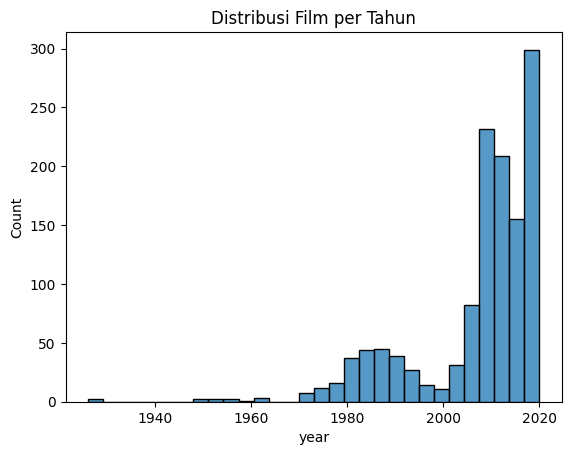

In [10]:
sns.histplot(df['year'], bins=30)
plt.title('Distribusi Film per Tahun')
plt.show()

Plot jumlah film yang dirilis setiap tahun, dapat diamati apakah industri perfilman Indonesia mengalami pertumbuhan, stagnasi, atau penurunan. Hasil visualisasi menunjukkan peningkatan signifikan dalam jumlah film yang diproduksi setelah tahun-tahun 2000, menandakan adanya perkembangan industri film lokal

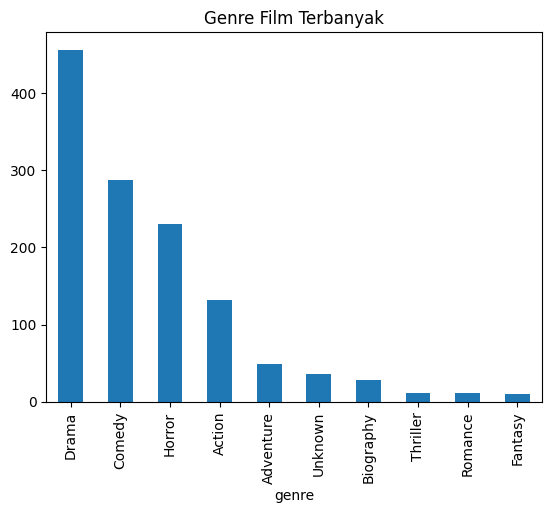

In [11]:
df['genre'].value_counts().head(10).plot(kind='bar')
plt.title('Genre Film Terbanyak')
plt.show()

Analisis ini mengidentifikasi genre paling populer atau paling sering diproduksi di Indonesia. Dengan menghitung frekuensi tiap genre, diketahui genre mana yang mendominasi dataset. Hasilnya memperlihatkan beberapa genre seperti drama, komedi, dan horror menjadi genre favorit

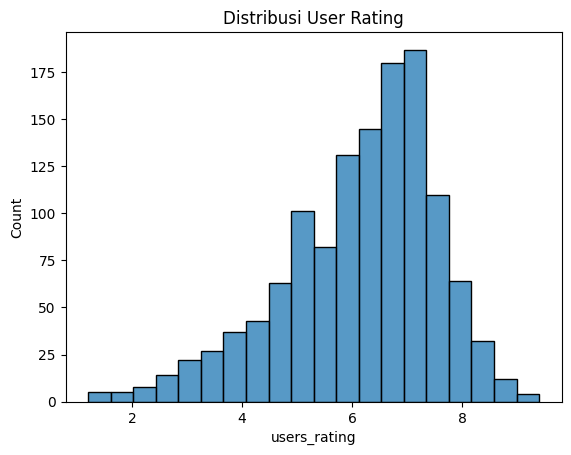

In [12]:
sns.histplot(df['users_rating'], bins=20)
plt.title('Distribusi User Rating')
plt.show()

Distribusi ini menggambarkan bagaimana penilaian pengguna terhadap film-film Indonesia. Dengan melihat sebaran nilai `users_rating`, dapat diketahui bahwa kebanyakan film mendapat rating 6 sampai 7. Pola sebaran ini juga membantu dalam menentukan threshold relevansi pada tahap evaluasi

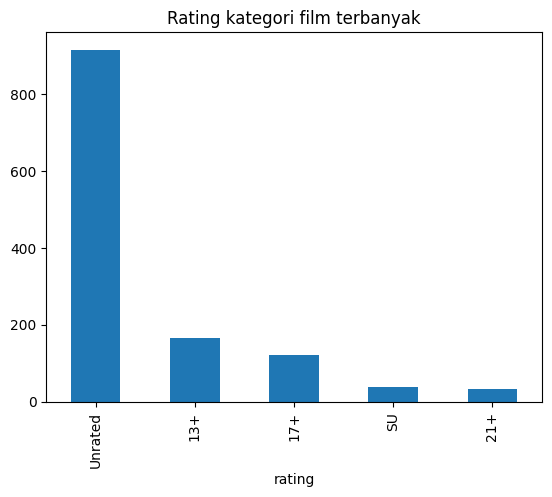

In [13]:
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title('Rating kategori film terbanyak')
plt.show()

Kategori rating mengacu pada klasifikasi umur/konten (seperti SU, 13+, 17+, dsb). Analisis ini memeriksa bagaimana distribusi film berdasarkan kategori rating, yang penting untuk memastikan sistem rekomendasi tidak merekomendasikan film yang tidak sesuai dengan preferensi usia pengguna

## Multivariate EDA

In [14]:
for genre in df["genre"].unique():
    data = df[df["genre"] == genre]
    print("Film populer dengan genre", genre, "=", data.sort_values("users_rating", ascending = False).head(1)["title"].values[0])

Film populer dengan genre Biography = Wage
Film populer dengan genre Thriller = Fiksi.
Film populer dengan genre Horror = Malam Jumat Kliwon
Film populer dengan genre Adventure = Anak Garuda
Film populer dengan genre Drama = Salisiah Adaik
Film populer dengan genre Comedy = Horas Amang: Tiga Bulan Untuk Selamanya
Film populer dengan genre Animation = November 10th
Film populer dengan genre Action = Merah Putih Memanggil
Film populer dengan genre History = Moonrise Over Egypt
Film populer dengan genre Crime = Leaf on a Pillow
Film populer dengan genre Romance = Turis Romantis
Film populer dengan genre Sci-Fi = Kurung Manuk (Bird Cage)
Film populer dengan genre Family = Lima Elang
Film populer dengan genre Unknown = Lupus
Film populer dengan genre War = Tropic of Emerald
Film populer dengan genre Fantasy = Loetoeng Kasaroeng


Analisis ini menghubungkan antara popularitas (user_rating) dengan genre film. Tujuannya untuk mengetahui genre apa yang memiliki film-film yang disukai user. Informasi ini bermanfaat untuk mengidentifikasi genre yang layak difokuskan pada sistem rekomendasi.

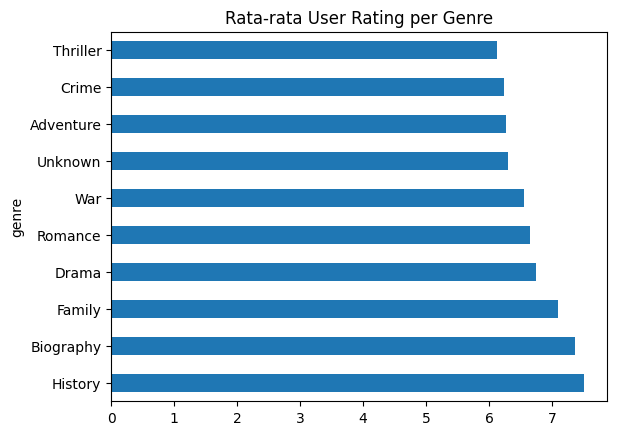

In [15]:
df.groupby('genre')['users_rating'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Rata-rata User Rating per Genre')
plt.show()

Analisis ini mencari genre yang rata-rata memiliki penilaian pengguna paling tinggi yaitu genre 'History'. Genre dengan rating rata-rata tinggi dapat dianggap memiliki kualitas konten yang baik


# Data Preparation

In [16]:
# menggabungkan kolom title, description, genre
df['combined'] = df['title'] + ' ' + df['description'] + ' ' + df['genre']

Menggabungkan kolom title, description, genre sebagai acuan untuk TF-IDF Vectorizer

In [17]:
# menggunakan teknik TF-IDF pada kolom yang digabungkan sebelumnya
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1272, 6263)

* TfidfVectorizer digunakan untuk mengubah koleksi dokumen teks mentah menjadi matriks fitur TF-IDF.

* Parameter stop_words='english' memberi tahu vektorizer untuk mengabaikan stop words bahasa Inggris. Stop words adalah kata-kata umum seperti "the", "a", "is", "and", dll., yang biasanya tidak membawa banyak makna dan dapat mengganggu analisis teks. Dengan menghapusnya, Model akan lebih fokus pada kata-kata yang lebih relevan.

In [18]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
# Melakukan normalisasi dengan Normalizer
normalizer = Normalizer()
tfidf_norm = normalizer.fit_transform(tfidf_matrix)

* TF-IDF yang sudah dinormalisasi menggunakan Normalizer berfungsi untuk setiap baris dalam matriks ini sekarang mewakili dokumen, dan panjang vektor untuk setiap dokumen adalah 1.

# Model Development : Content based filtering

In [20]:
# membuat model menggunakan cosine similarity
similarity_cb = cosine_similarity(tfidf_norm)
similarity_cb

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.03508161, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03508161, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.03014689],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03014689,
        1.        ]])

Cosine similarity adalah metrik yang digunakan untuk mengukur kemiripan antara dua vektor non-nol dalam ruang produk skalar. Dalam konteks pengolahan bahasa alami (NLP).

* Bagaimana cara kerjanya?

Setiap dokumen direpresentasikan sebagai vektor dalam ruang multidimensi (dimana setiap dimensi adalah kata unik).
Cosine similarity menghitung kosine dari sudut antara dua vektor.
Nilai cosine similarity berkisar antara -1 hingga 1:

1: Menunjukkan bahwa kedua vektor (dokumen) sangat mirip atau identik. Sudut antara mereka adalah 0 derajat.

0: Menunjukkan bahwa kedua vektor (dokumen) tidak terkait sama sekali atau ortogonal. Sudut antara mereka adalah 90 derajat.

-1: Menunjukkan bahwa kedua vektor (dokumen) sangat berlawanan. Sudut antara mereka adalah 180 derajat.

**Karena vektor TF-IDF yang sudah dinormalisasi biasanya hanya memiliki nilai positif (atau nol), maka nilai cosine similarity-nya akan berkisar antara 0 dan 1.**

In [21]:
# Menyimpan nilai simalarity ke dalam dataframe
similarity_df = pd.DataFrame(similarity_cb, index=df['title'], columns=df['title'])

Menyimpan perhitungan cosine similarity ke dalam dataframe untuk melihat nilai kemiripan konten pada film

# Testing Model

In [22]:
def recommend_movies(title, n=5):
    if title not in similarity_df.columns:
        return f"Judul film '{title}' tidak ditemukan."

    similar_movies = similarity_df[title].sort_values(ascending=False)[1:n+1]
    return pd.DataFrame({
        'Rekomendasi': similar_movies.index,
        'Skor Similarity': similar_movies.values
    })

# Film yang mirip dilan
recommend_movies('Dilan 1990', 5)

,Rekomendasi,Skor Similarity
0,Dilan 1991,0.424312
1,Milea,0.398010
2,#FriendButMarried,0.081241
3,Rindu Kami Padamu,0.071242
4,From Bandung with Love,0.063687


Dari testing model untuk Rekomendasi film yang mirip dengan dilan 1990 yaitu ada Dilan 1991 dan Milea yang merupakan sekuel dari dilan 1990 dengan kemiripan sekitar 0,4, lalu selanjutnya ada #FriendButMarried dengan skor similarity 0.08

# Model Evaluation

In [23]:
# Menampilkan dataframe
similarity_df.head()

title,#FriendButMarried 2,4 Mantan,Aku Tahu Kapan Kamu Mati,Anak Garuda,Dignitate,Guru-Guru Gokil,Hunter in the Blue Side of Manchester,Janin,Mangkujiwo,Mariposa,...,Pedjuang,Asrama Dara,Tiga Dara,Tamu Agung,Lewat Djam Malam,The Tiger from Tjampa,Enam Djam di Djogja,Darah dan Doa,Resia Boroboedoer,Loetoeng Kasaroeng
title,,,,,,,,,,,,,,,,,,,,,
#FriendButMarried 2,1.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.024546,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4 Mantan,0.0,1.000000,0.035082,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Aku Tahu Kapan Kamu Mati,0.0,0.035082,1.000000,0.00000,0.00000,0.000000,0.000000,0.007786,0.016297,0.000000,...,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Anak Garuda,0.0,0.000000,0.000000,1.00000,0.01947,0.018243,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0667,0.0,0.000000,0.000000,0.000000,0.019352,0.051245,0.0
Dignitate,0.0,0.000000,0.000000,0.01947,1.00000,0.042979,0.000000,0.000000,0.000000,0.004258,...,0.0,0.008003,0.0000,0.0,0.035941,0.004604,0.005129,0.008169,0.000000,0.0


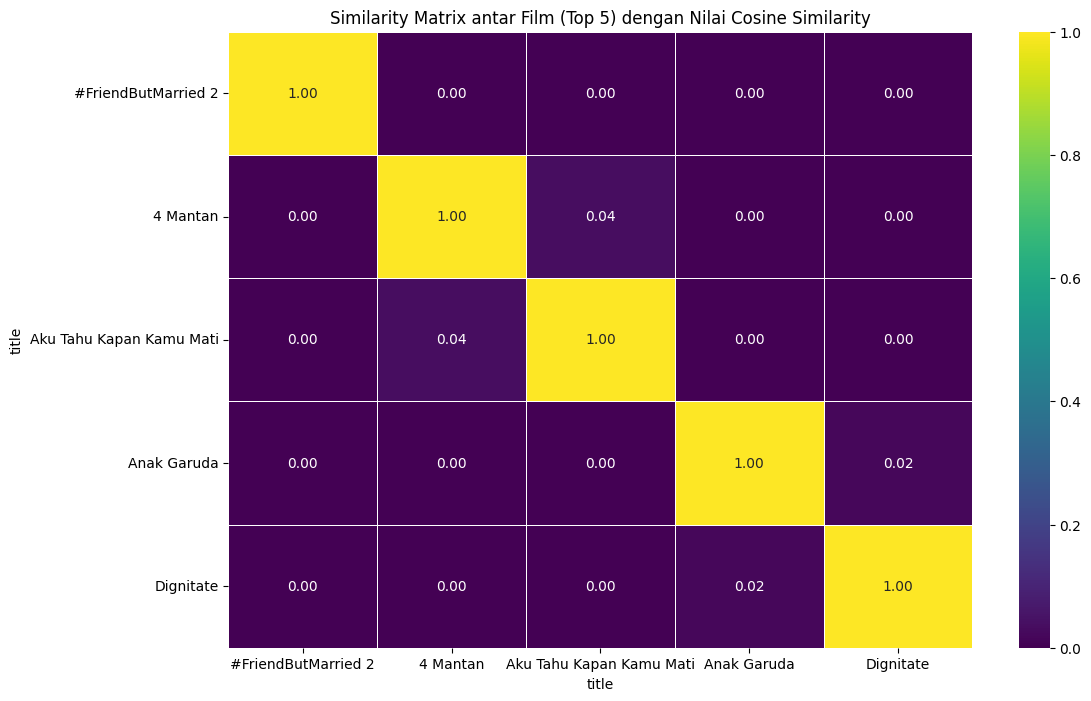

In [24]:
# Visualisasi matriks similarity
plt.figure(figsize=(12,8))
sns.heatmap(similarity_df.iloc[:5, :5],
            cmap='viridis',
            annot=True,
            fmt=".2f",
            linewidths=0.5)
plt.title("Similarity Matrix antar Film (Top 5) dengan Nilai Cosine Similarity")
plt.show()

Matriks similarity menunjukkan rendahnya kemiripan antar sebagian besar film berdasarkan konten teks TF-IDF (banyak nilai 0.00). Ini menyiratkan konten film yang sangat beragam/unik.

Namun, terdapat poin kemiripan menarik seperti "Aku tahu kapan kamu mati" dengan "4 Mantan" (0.04) yang menjadi kandidat utama untuk rekomendasi berbasis konten dan menunjukkan model berhasil menangkap koneksi khusus.

In [25]:
threshold = 6.0  # batasan rating >= 6 dianggap relevan

def get_top_k_recommendations(title, k=5):
    similar_movies = similarity_df[title].sort_values(ascending=False)[1:k+1]
    return similar_movies.index.tolist()

def precision_at_k(title, k=5, threshold=threshold):
    top_k = get_top_k_recommendations(title, k)

    # Hitung jumlah rekomendasi relevan (users_rating >= threshold)
    relevan = df[df['title'].isin(top_k)]
    relevan_count = (relevan['users_rating'] >= threshold).sum()

    precision = relevan_count / k
    return precision

In [26]:
film_sample = df['title'].sample(10, random_state=1)
precision_list = []

for film in film_sample:
    try:
        p = precision_at_k(film, k=5)
        precision_list.append(p)
    except:
        continue

average_precision = np.mean(precision_list)
print(f'Average Precision@5: {average_precision:.2f}')

Average Precision@5: 0.48


Rata-rata precision@5 sekitar 48% dari 5 rekomendasi teratas yang diberikan oleh sistem Anda 2 sampai 3 di antaranya adalah relevan bagi pengguna.

**Ini menunjukkan bahwa sistem rekomendasi memiliki kemampuan yang lumayan untuk mendapatkan rekomendasi film dengan genre, deskripsi, dan judul yang mirip**